In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('crop_recommendation2.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].value_counts()

pomegranate    100
orange         100
pigeonpeas     100
coffee         100
banana         100
apple          100
papaya         100
grapes         100
blackgram      100
muskmelon      100
mothbeans      100
lentil         100
maize          100
mango          100
coconut        100
rice           100
watermelon     100
kidneybeans    100
mungbean       100
jute           100
chickpea       100
cotton         100
Name: label, dtype: int64

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
s = df.corr()
print(s)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<AxesSubplot:>

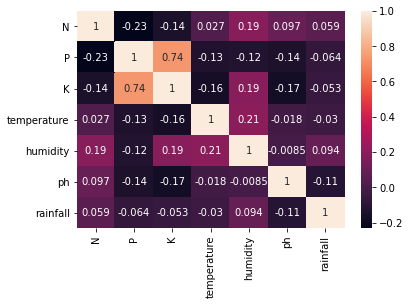

In [ ]:
sns.heatmap(s,annot = True)

In [ ]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)
     

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))

Decision Tree's accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(DecisionTree,features,target,cv = 5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))

Naive Bayes accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

In [ ]:
score = cross_val_score(Naive_Bayes,features,target,cv = 5)

In [ ]:
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.

In [ ]:
score = cross_val_score(LogReg,features,target,cv = 5)

In [ ]:
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC(gamma = 'auto')
SVM.fit(X_train,y_train)

predicted = SVM.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('SVM')
print('SVM accuracy score is',x * 100)
print(classification_report(y_test,predicted))

SVM accuracy score is 10.681818181818182
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0

In [ ]:
score = cross_val_score(SVM,features,target,cv = 5)

In [ ]:
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
     

In [ ]:
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy',random_state=0)
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
score = cross_val_score(RF,features,target,cv = 5)

In [ ]:
score

array([0.99772727, 0.99090909, 0.99545455, 0.99318182, 0.98636364])

<AxesSubplot:title={'center':'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

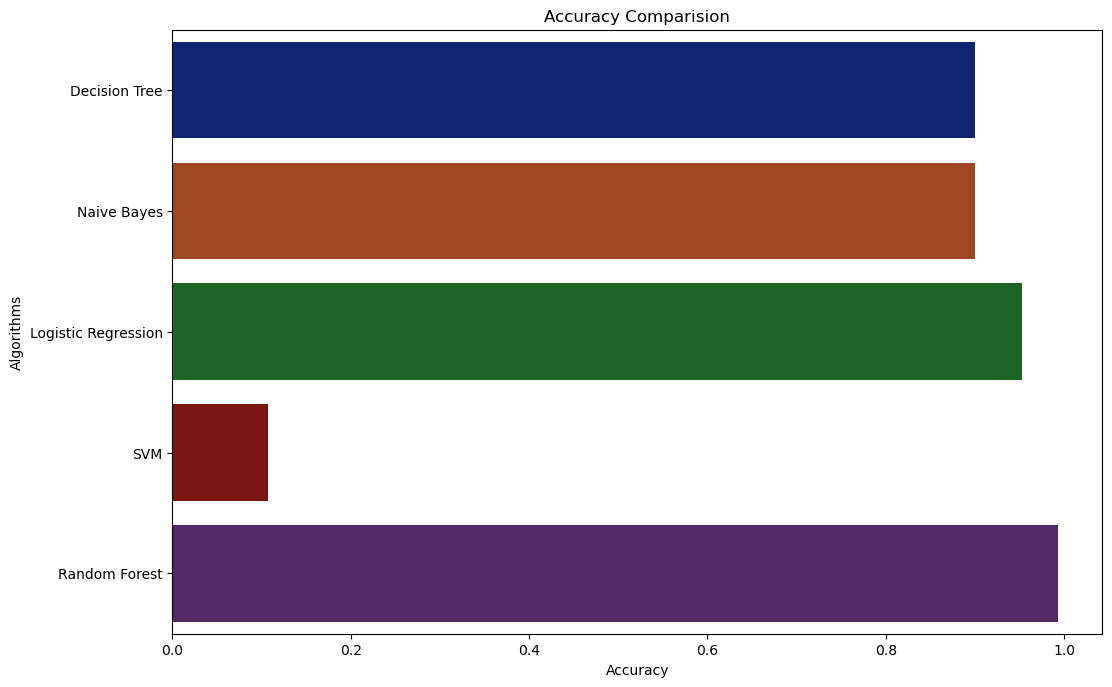

In [ ]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [ ]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

Decision Tree --> 90.0 %
Naive Bayes --> 90.0 %
Logistic Regression --> 95.22727272727273 %
SVM --> 10.681818181818182 %
Random Forest --> 99.31818181818181 %


In [ ]:
data = np.array([[90,42, 43, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [ ]:
data = np.array([[9,2, 13, 24.603016, 46.3, 1.7, 110.91]])
prediction = RF.predict(data)
print(prediction)

['mothbeans']


In [ ]:
data = np.array([[19,21, 73, 34.603016, 56.3, 6.7, 210.91]])
prediction = RF.predict(data)
print(prediction)

['mango']


In [ ]:
data = np.array([[19,21, 73, 44.603016, 16.3, 6.7, 210.91]])
prediction = RF.predict(data)
print(prediction)

['chickpea']


In [ ]:
data = np.array([[99,21, 73, 34.603016, 56.3, 6.7, 210.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [ ]:
data = np.array([[19,91, 33, 14.603016, 56.3, 2.7, 110.91]])
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']


In [ ]:
 #features = df[['N','P','K','temperature','humidity','ph','rainfall']]
 # target = df['label']

In [ ]:
def predict_crop(model):
    # Prompt user to enter feature values
    N = float(input("Enter nitrogen content (N): "))
    P = float(input("Enter phosphorus content (P): "))
    K = float(input("Enter potassium content (K): "))
    temperature = float(input("Enter temperature: "))
    humidity = float(input("Enter humidity: "))
    ph = float(input("Enter pH value: "))
    rainfall = float(input("Enter rainfall: "))

    # Create a data array with the input feature values
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Predict the crop
    prediction = model.predict(data)

    return prediction

predicted_crop = predict_crop(RF)
print("Predicted crop:", predicted_crop)


Enter nitrogen content (N): 20
Enter phosphorus content (P): 21
Enter potassium content (K): 24
Enter temperature: 45
Enter humidity: 50
Enter pH value: 6
Enter rainfall: 210
Predicted crop: ['mango']
